# Michelle Helfman Final Project

## Males vs Females (MVF) - Have Women Finally Caught Up To Men?

<h3>What are the most significant factors contributing to the difference in employment <br>and education percentages, and income for each state.  <br>Based on 2021 American Community Survey 1-Year Estimates data.</h3>
 
<h4>Employment and education numbers are shown as percentages so the states with the largest <br>
and smallest populations will have the equal representation.  The income is the average income per <br>
gender and state.</h4>

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
%matplotlib inline

# Import Functions
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px

import thinkstats2 
import thinkplot  
import scipy.stats  

from scipy.stats import lognorm
from thinkstats2 import Mean, MeanVar, Var, Std, Cov, Cdf, Corr
import statsmodels.formula.api as smf
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Male vs Female Information
MVF_file_path = ('C:\DSC530_Data\Male_vs_Female_EXCEL.xlsx')

# Create data frames by Male, Female, and All records
MVF_df = pd.read_excel(MVF_file_path, sheet_name='MVF')

male_df = MVF_df[MVF_df['Sex'] == 'Male']
female_df = MVF_df[MVF_df['Sex'] == 'Female']

In [4]:
# Set your custom color palette

colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
female_red = "#FF0B04"
male_blue = "#4374B3"
combined = "#782F98"

## Histograms and Discriptive Information.

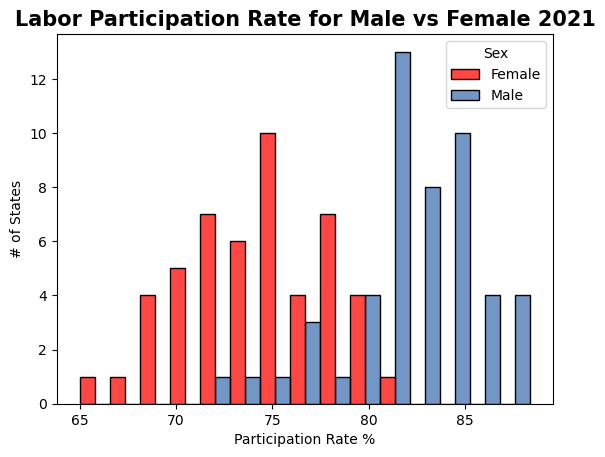

In [5]:
# Labor Participation Rate by state and sex

labor_hist = sns.histplot(data=MVF_df, x='Labor_Participation_PCT', 
                          bins=15, hue='Sex', multiple='dodge')
labor_hist.set_title('Labor Participation Rate for Male vs Female 2021', 
                      fontdict={'size': 15, 'weight': 'bold', 'color': 'black'})
labor_hist.set(xlabel='Participation Rate %', ylabel='# of States')

plt.show()

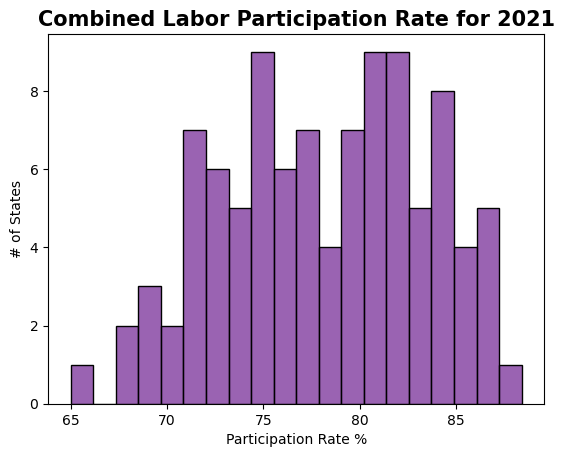

In [6]:
# Labor Participation Rate by state
labor_hist = sns.histplot(data=MVF_df, x='Labor_Participation_PCT', 
                          bins=20, color=combined, multiple='dodge')
labor_hist.set_title('Combined Labor Participation Rate for 2021', 
                      fontdict={'size': 15, 'weight': 'bold', 'color': 'black'})
labor_hist.set(xlabel='Participation Rate %', ylabel='# of States')

plt.show()

In [7]:
# Discriptive Information for Labor Participation Rate

# Find Highest & Lowest with Frequency of Labor Participation
labor = thinkstats2.Hist(MVF_df.Labor_Participation_PCT, 
                         label='Labor Participation')
print('Frequency of Highest Labor Participation')
for Labor_Participation_PCT, freq in labor.Largest(10):
    print(Labor_Participation_PCT, freq)
    
print('\nFrequency of Lowest Labor Participation')
for Labor_Participation_PCT, freq in labor.Smallest(10):
    print(Labor_Participation_PCT, freq)
    
# Sort the Records by Labor Participation and 
# find the highest and lowest and show State and Sex

# labor_info = MVF_df[['State', 'Sex', 'Labor_Participation_PCT']]
sorted_labor = MVF_df.sort_values('Labor_Participation_PCT',ascending = False)
print('\nTop 10 of Labor Participation')
print(sorted_labor[['State', 'Sex', 'Labor_Participation_PCT']].head(10))
print('\nBottom 10 of Labor Participation')
print(sorted_labor[['State', 'Sex', 'Labor_Participation_PCT']].tail(10))

# Find Mean, Variance, and Standard Deviation
labor_mean = MVF_df.Labor_Participation_PCT.mean()
labor_mode = MVF_df.Labor_Participation_PCT.mode()
labor_var = MVF_df.Labor_Participation_PCT.var()
labor_std = MVF_df.Labor_Participation_PCT.std()
print('\nMean, Mode, Variance, and Standard Deviation of Labor Participation')
print('Mean = ', labor_mean)
print('Mode = ', labor_mode)
print('Variance = ', labor_var)
print('Standard Deviation = ', labor_std)

# Find the Mean for Males & Females
mlabor_mean = male_df.Labor_Participation_PCT.mean()
flabor_mean = female_df.Labor_Participation_PCT.mean()
print('\nMean of Labor Participation by Gender')
print('Mean of Males = ', mlabor_mean)
print('Mean of Females = ', flabor_mean)

Frequency of Highest Labor Participation
88.4 1
87.2 1
86.9 2
86.4 1
86.3 1
85.9 2
85.1 1
84.9 1
84.8 2
84.4 2

Frequency of Lowest Labor Participation
65.0 1
67.8 1
68.5 1
68.7 1
69.1 1
69.6 1
70.6 1
70.7 1
71.0 1
71.1 2

Top 10 of Labor Participation
            State   Sex  Labor_Participation_PCT
87           Utah  Male                     88.4
53       Nebraska  Male                     87.2
45      Minnesota  Male                     86.9
67   North Dakota  Male                     86.9
99        Wyoming  Male                     86.4
11       Colorado  Male                     86.3
57  New Hampshire  Male                     85.9
29           Iowa  Male                     85.9
81   South Dakota  Male                     85.1
39       Maryland  Male                     84.9

Bottom 10 of Labor Participation
             State     Sex  Labor_Participation_PCT
78  South Carolina  Female                     71.1
70        Oklahoma  Female                     71.0
82       Tennessee

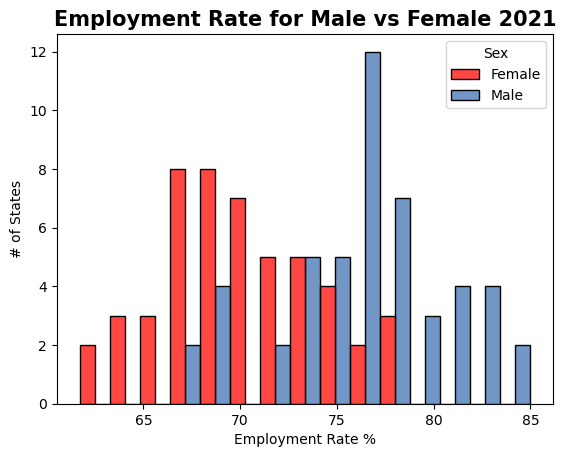

In [8]:
# Employment % by state and sex

employ_hist = sns.histplot(data=MVF_df, x='Employment_PCT', 
                           bins=15, hue='Sex', multiple='dodge')
employ_hist.set_title('Employment Rate for Male vs Female 2021', 
                      fontdict={'size': 15, 'weight': 'bold', 'color': 'black'})
employ_hist.set(xlabel='Employment Rate %', ylabel='# of States')

plt.show()

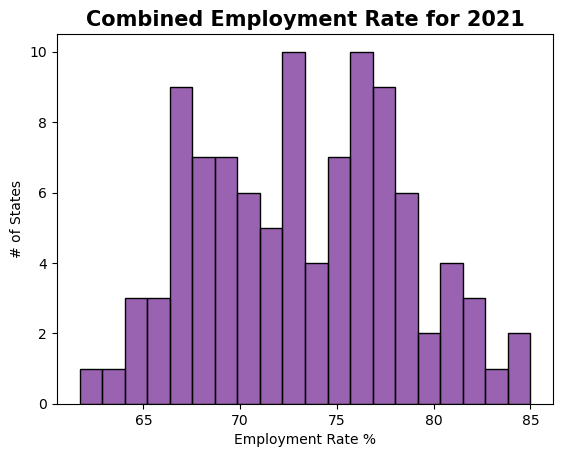

In [9]:
# Employment Rate by state
emp_hist = sns.histplot(data=MVF_df, x='Employment_PCT', 
                          bins=20, color=combined, multiple='dodge')
emp_hist.set_title('Combined Employment Rate for 2021', 
                      fontdict={'size': 15, 'weight': 'bold', 'color': 'black'})
emp_hist.set(xlabel='Employment Rate %', ylabel='# of States')

plt.show()

In [10]:
# Discriptive Information for Employment Rate

# Find Highest & Lowest with Frequency of Employment Rate
emp = thinkstats2.Hist(MVF_df.Employment_PCT, label='Employment Rate')
print('Frequency of Highest Employment Rate')
for Employment_PCT, freq in emp.Largest(10):
    print(Employment_PCT, freq)
    
print('\nFrequency of Lowest Employment Rate')
for Employment_PCT, freq in emp.Smallest(10):
    print(Employment_PCT, freq)
    
# Sort the Records by Employment Rate and 
# find the highest and lowest and show State and Sex

# emp_info = MVF_df[['State', 'Sex', 'Employment_PCT']]
sorted_emp = MVF_df.sort_values('Employment_PCT',ascending = False)
print('\nTop 10 Employment Rate')
print(sorted_emp[['State', 'Sex', 'Employment_PCT']].head(10))
print('\nBottom 10 Employment Rate')
print(sorted_emp[['State', 'Sex', 'Employment_PCT']].tail(10))

# Find Mean, Variance, and Standard Deviation
emp_mean = MVF_df.Employment_PCT.mean()
emp_mode = MVF_df.Employment_PCT.mode()
emp_var = MVF_df.Employment_PCT.var()
emp_std = MVF_df.Employment_PCT.std()
print('\nMean, Mode, Variance, and Standard Deviation of Employment Rate')
print('Mean = ', emp_mean)
print('Mode = ', emp_mode)
print('Variance = ', emp_var)
print('Standard Deviation = ', emp_std)

# Find the Mean for Males & Females
memp_mean = male_df.Employment_PCT.mean()
femp_mean = female_df.Employment_PCT.mean()
print('\nMean of Employment Rate by Gender')
print('Mean of Males = ', memp_mean)
print('Mean of Females = ', femp_mean)

Frequency of Highest Employment Rate
85.0 1
84.3 1
82.7 1
82.4 2
81.9 1
81.3 1
81.1 1
80.8 1
80.6 1
80.1 1

Frequency of Lowest Employment Rate
61.7 1
63.1 1
64.1 1
64.2 1
64.6 1
65.9 3
66.5 1
66.6 1
66.9 2
67.1 2

Top 10 Employment Rate
            State   Sex  Employment_PCT
87           Utah  Male            85.0
53       Nebraska  Male            84.3
57  New Hampshire  Male            82.7
29           Iowa  Male            82.4
45      Minnesota  Male            82.4
99        Wyoming  Male            81.9
81   South Dakota  Male            81.3
67   North Dakota  Male            81.1
97      Wisconsin  Male            80.8
23          Idaho  Male            80.6

Bottom 10 Employment Rate
            State     Sex  Employment_PCT
84          Texas  Female            66.6
95  West Virginia    Male            66.5
8      California  Female            65.9
32       Kentucky  Female            65.9
54         Nevada  Female            65.9
34      Louisiana  Female            64.6
0

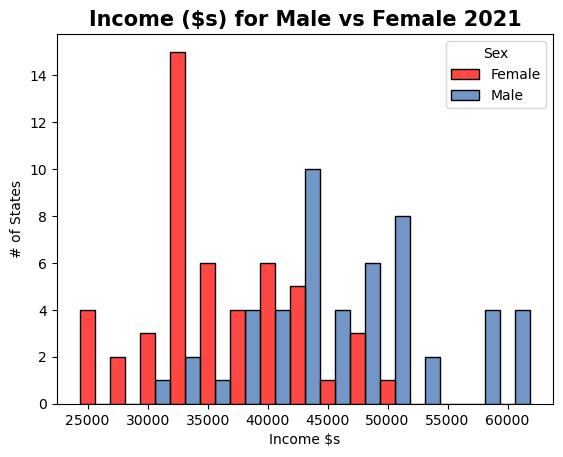

In [11]:
# Income by state and sex

income_hist = sns.histplot(data=MVF_df, x='Income', 
                           bins=15, hue='Sex', multiple='dodge')
income_hist.set_title('Income ($s) for Male vs Female 2021', 
                      fontdict={'size': 15, 'weight': 'bold', 'color': 'black'})
income_hist.set(xlabel='Income $s', ylabel='# of States')

plt.show()

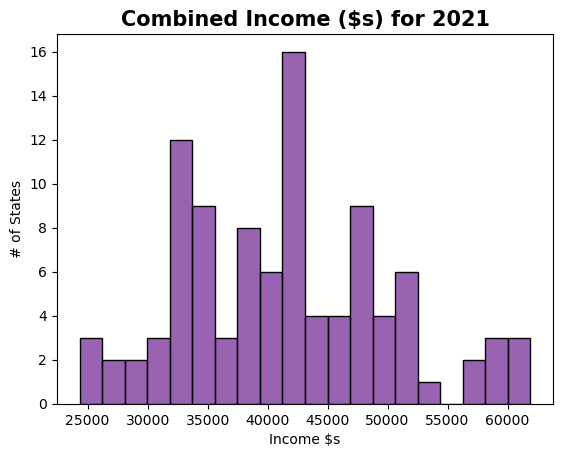

In [12]:
# Income ($s) by state
income_hist = sns.histplot(data=MVF_df, x='Income', 
                          bins=20, color=combined, multiple='dodge')
income_hist.set_title('Combined Income ($s) for 2021', 
                      fontdict={'size': 15, 'weight': 'bold', 'color': 'black'})
income_hist.set(xlabel='Income $s', ylabel='# of States')

plt.show()

In [13]:
# Discriptive Information for Income Level

# Find Highest & Lowest with Frequency of Income Level
income = thinkstats2.Hist(MVF_df.Income, label='Income Level')
print('Frequency of Highest Income Level')
for Income, freq in income.Largest(10):
    print(Income, freq)
    
print('\nFrequency of Lowest Income Level')
for Income, freq in income.Smallest(10):
    print(Income, freq)
    
# Sort the Records by Income Level and 
# find the highest and lowest and show State and Sex
sorted_income = MVF_df.sort_values('Income',ascending = False)
print('\nTop 10 Income Level')
print(sorted_income[['State', 'Sex', 'Income']].head(10))
print('\nBottom 10 Income Level')
print(sorted_income[['State', 'Sex', 'Income']].tail(10))

# Find Mean, Variance, and Standard Deviation
income_mean = MVF_df.Income.mean()
income_mode = MVF_df.Income.mode()
income_var = MVF_df.Income.var()
income_std = MVF_df.Income.std()
print('\nMean, Mode, Variance, and Standard Deviation of Income Level')
print('Mean = ', income_mean)
print('Mode = ', income_mode)
print('Variance = ', income_var)
print('Standard Deviation = ', income_std)

# Find the Mean for Males & Females
mincome_mean = male_df.Income.mean()
fincome_mean = female_df.Income.mean()
print('\nMean of Income by Gender')
print('Mean of Males = ', mincome_mean)
print('Mean of Females = ', fincome_mean)

Frequency of Highest Income Level
61914 1
61488 1
60189 1
59651 1
59128 1
59126 1
57002 1
56959 1
54259 1
52473 1

Frequency of Lowest Income Level
24324 1
25681 1
26041 1
26390 1
27159 1
28312 1
29666 1
30700 1
31249 1
31781 1

Top 10 Income Level
            State   Sex  Income
9      California  Male   61914
39       Maryland  Male   61488
41  Massachusetts  Male   60189
93     Washington  Male   59651
59     New Jersey  Male   59128
57  New Hampshire  Male   59126
21         Hawaii  Male   57002
11       Colorado  Male   56959
91       Virginia  Male   54259
15       Delaware  Male   52473

Bottom 10 Income Level
            State     Sex  Income
82      Tennessee  Female   31781
98        Wyoming  Female   31249
47    Mississippi    Male   30700
70       Oklahoma  Female   29666
32       Kentucky  Female   28312
6        Arkansas  Female   27159
34      Louisiana  Female   26390
94  West Virginia  Female   26041
0         Alabama  Female   25681
46    Mississippi  Female   24324



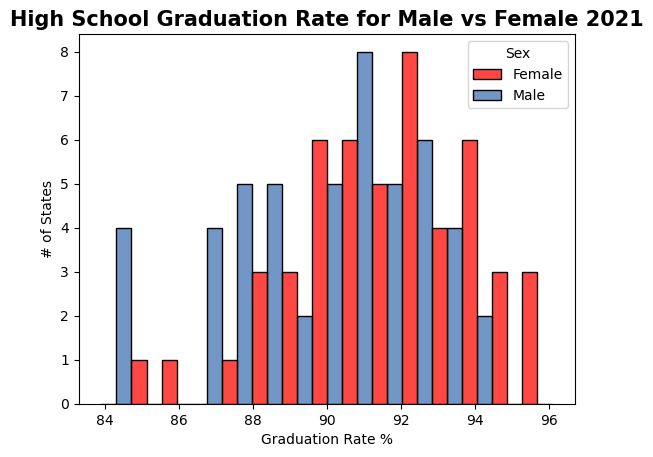

In [14]:
# High School Graduation Rate by state and sex

hs_hist = sns.histplot(data=MVF_df, x='High_School_PCT', 
                       bins=15, hue='Sex', multiple='dodge')
hs_hist.set_title('High School Graduation Rate for Male vs Female 2021', 
                      fontdict={'size': 15, 'weight': 'bold', 'color': 'black'})
hs_hist.set(xlabel='Graduation Rate %', ylabel='# of States')

plt.show()

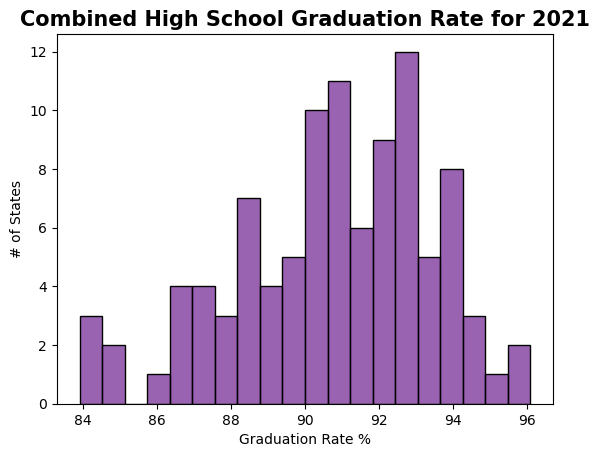

In [15]:
# High School Graduation Rate by state
hs_hist = sns.histplot(data=MVF_df, x='High_School_PCT', 
                          bins=20, color=combined, multiple='dodge')
hs_hist.set_title('Combined High School Graduation Rate for 2021', 
                      fontdict={'size': 15, 'weight': 'bold', 'color': 'black'})
hs_hist.set(xlabel='Graduation Rate %', ylabel='# of States')

plt.show()

In [16]:
# Discriptive Information for High School Graduation Rate

# Find Highest & Lowest with Frequency of High School Graduation Rate
hsg = thinkstats2.Hist(MVF_df.High_School_PCT, 
                       label='High School Graduation Rate')
print('Frequency of Highest High School Graduation Rate')
for High_School_PCT, freq in hsg.Largest(10):
    print(High_School_PCT, freq)
    
print('\nFrequency of Lowest High School Graduation Rate')
for High_School_PCT, freq in hsg.Smallest(10):
    print(High_School_PCT, freq)
    
# Sort the Records by High School Graduation Rate and 
# find the highest and lowest and show State and Sex
sorted_hsg = MVF_df.sort_values('High_School_PCT',ascending = False)
print('\nTop 10 High School Graduation Rate')
print(sorted_hsg[['State', 'Sex', 'High_School_PCT']].head(10))
print('\nBottom 10 High School Graduation Rate')
print(sorted_hsg[['State', 'Sex', 'High_School_PCT']].tail(10))

# Find Mean, Mode, Variance, and Standard Deviation
hsg_mean = MVF_df.High_School_PCT.mean()
hsg_mode = MVF_df.High_School_PCT.mode()
hsg_var = MVF_df.High_School_PCT.var()
hsg_std = MVF_df.High_School_PCT.std()
print('\nMean, Mode, Variance, and Std Deviation of High School Graduation Rate')
print('Mean = ', hsg_mean)
print('Mode = ', hsg_mode)
print('Variance = ', hsg_var)
print('Standard Deviation = ', hsg_std)

# Find the Mean for Males & Females
mhs_mean = male_df.High_School_PCT.mean()
fhs_mean = female_df.High_School_PCT.mean()
print('\nMean of High School Graduation Rates by Gender')
print('Mean of Males = ', mhs_mean)
print('Mean of Females = ', fhs_mean)

Frequency of Highest High School Graduation Rate
96.1 1
95.7 1
95.3 1
94.7 1
94.6 1
94.5 1
94.2 1
94.1 4
94.0 1
93.7 2

Frequency of Lowest High School Graduation Rate
83.9 1
84.0 1
84.3 1
84.6 1
84.9 1
86.2 1
86.4 1
86.7 1
86.9 2
87.3 1

Top 10 High School Graduation Rate
            State     Sex  High_School_PCT
88        Vermont  Female             96.1
36          Maine  Female             95.7
50        Montana  Female             95.3
56  New Hampshire  Female             94.7
44      Minnesota  Female             94.6
98        Wyoming  Female             94.5
57  New Hampshire    Male             94.2
80   South Dakota  Female             94.1
66   North Dakota  Female             94.1
96      Wisconsin  Female             94.1

Bottom 10 High School Graduation Rate
          State     Sex  High_School_PCT
55       Nevada    Male             86.9
61   New Mexico    Male             86.9
33     Kentucky    Male             86.7
1       Alabama    Male             86.4
84       

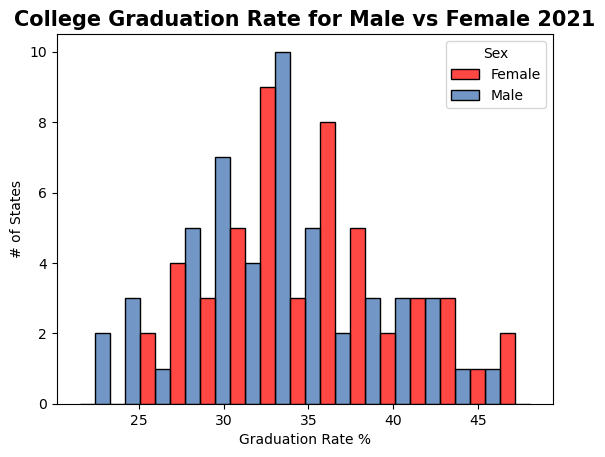

In [17]:
# College Graduation Rate by state and sex

college_hist = sns.histplot(data=MVF_df, x='College_Grad_PCT', 
                            bins=15, hue='Sex', multiple='dodge')
college_hist.set_title('College Graduation Rate for Male vs Female 2021', 
                      fontdict={'size': 15, 'weight': 'bold', 'color': 'black'})
college_hist.set(xlabel='Graduation Rate %', ylabel='# of States')

plt.show()

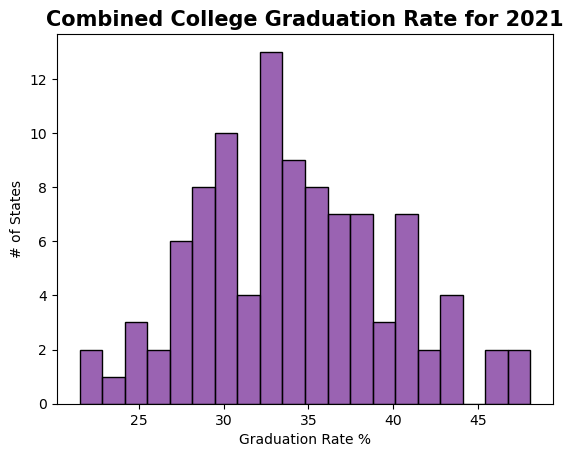

In [18]:
# College Graduation Rate by state
col_hist = sns.histplot(data=MVF_df, x='College_Grad_PCT', 
                          bins=20, color=combined, multiple='dodge')
col_hist.set_title('Combined College Graduation Rate for 2021', 
                      fontdict={'size': 15, 'weight': 'bold', 'color': 'black'})
col_hist.set(xlabel='Graduation Rate %', ylabel='# of States')

plt.show()

In [19]:
# Discriptive Information for College Graduation Rate

# Find Highest & Lowest with Frequency of College Graduation Rate
cgr = thinkstats2.Hist(MVF_df.College_Grad_PCT, label='College Graduation Rate')
print('Frequency of Highest College Graduation Rate')
for College_Grad_PCT, freq in cgr.Largest(10):
    print(College_Grad_PCT, freq)
    
print('\nFrequency of Lowest College Graduation Rate')
for College_Grad_PCT, freq in cgr.Smallest(10):
    print(College_Grad_PCT, freq)
    
# Sort the Records by College Graduation Rate and 
# find the highest and lowest and show State and Sex
sorted_cgr = MVF_df.sort_values('College_Grad_PCT',ascending = False)
print('\nTop 10 College Graduation Rate')
print(sorted_cgr[['State', 'Sex', 'College_Grad_PCT']].head(10))
print('\nBottom 10 College Graduation Rate')
print(sorted_cgr[['State', 'Sex', 'College_Grad_PCT']].tail(10))

# Find Mean, Variance, and Standard Deviation
cgr_mean = MVF_df.College_Grad_PCT.mean()
cgr_var = MVF_df.College_Grad_PCT.var()
cgr_std = MVF_df.College_Grad_PCT.std()
cgr_mode = MVF_df.College_Grad_PCT.mode()
print('\nMean, Mode, Variance, and Standard Deviation of College Graduation Rate')
print('Mean = ', cgr_mean)
print('Mode = ', cgr_mode)
print('Variance = ', cgr_var)
print('Standard Deviation = ', cgr_std)

# Find the Mean for Males & Females
mcol_mean = male_df.College_Grad_PCT.mean()
fcol_mean = female_df.College_Grad_PCT.mean()
print('\nMean of College Graduation Rates by Gender')
print('Mean of Males = ', mcol_mean)
print('Mean of Females = ', fcol_mean)

Frequency of Highest College Graduation Rate
48.1 1
47.4 1
46.0 1
45.8 1
43.6 1
43.5 2
42.9 1
42.7 1
42.5 1
41.4 2

Frequency of Lowest College Graduation Rate
21.5 1
22.8 1
23.8 1
24.5 1
25.0 1
25.4 1
26.4 1
26.6 1
27.0 1
27.1 1

Top 10 College Graduation Rate
            State     Sex  College_Grad_PCT
88        Vermont  Female              48.1
40  Massachusetts  Female              47.4
10       Colorado  Female              46.0
41  Massachusetts    Male              45.8
38       Maryland  Female              43.6
12    Connecticut  Female              43.5
58     New Jersey  Female              43.5
11       Colorado    Male              42.9
59     New Jersey    Male              42.7
90       Virginia  Female              42.5

Bottom 10 College Graduation Rate
            State     Sex  College_Grad_PCT
71       Oklahoma    Male              27.1
55         Nevada    Male              27.0
6        Arkansas  Female              26.6
1         Alabama    Male              26.4

## PMF Comparison

### High School Graduation Rates

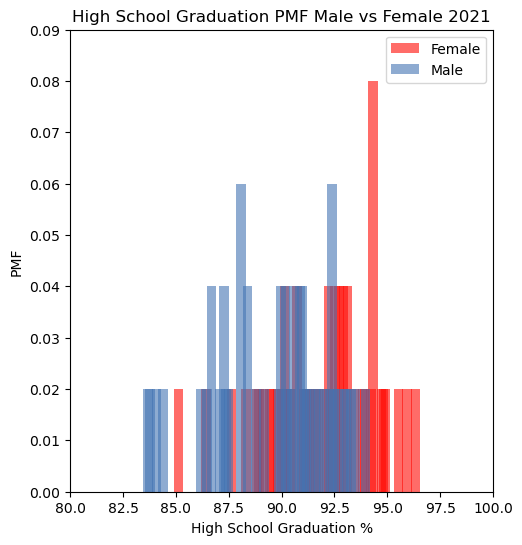

In [20]:
male_pmf = thinkstats2.Pmf(male_df.High_School_PCT, label="Male")
female_pmf = thinkstats2.Pmf(female_df.High_School_PCT, label="Female")

width = 0.45
axis = [80, 100, 0, 0.09]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(female_pmf, align="left", width=width, 
               edgecolor="black", color=female_red)
thinkplot.Hist(male_pmf, align="right", width=width, 
               edgecolor="black", color=male_blue)
thinkplot.Config(title="High School Graduation PMF Male vs Female 2021", 
                 xlabel="High School Graduation %", 
                 ylabel="PMF", axis=axis)

## CDF Analysis

### College Graduation Rates

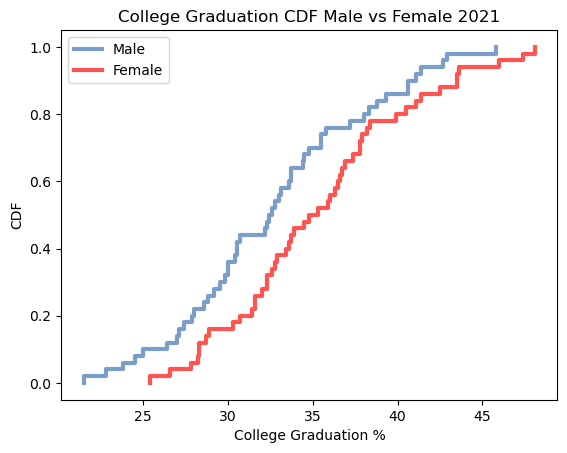

In [21]:
# Compare cdf College Degree Rate for Male vs Female
male_cdf = thinkstats2.Cdf(male_df.College_Grad_PCT, label="Male")
female_cdf = thinkstats2.Cdf(female_df.College_Grad_PCT, 
                             label="Female")

thinkplot.PrePlot(2)
thinkplot.Cdf(male_cdf, color=male_blue)
thinkplot.Cdf(female_cdf, color=female_red)
thinkplot.config(xlabel="College Graduation %", ylabel="CDF", 
               title="College Graduation CDF Male vs Female 2021", 
               loc='upper left')

## Analytical Distribution

### Income - Normal Distribution - Compare observed CDF to the model.  

n, mean, std 100 41390.12244897959 8309.266533933367


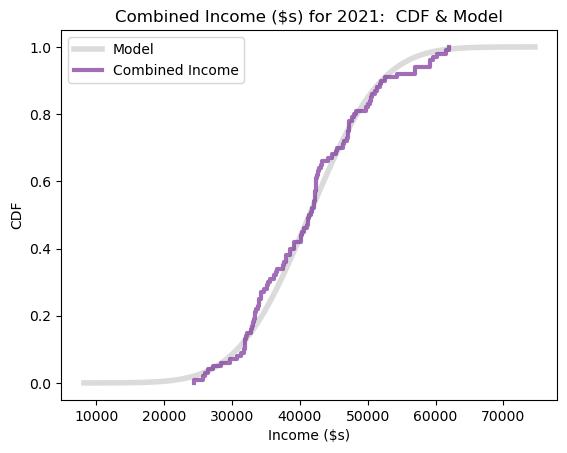

In [22]:
# Get income only information and # plot the 
# Observed CDF vs the model in normal mode

income = MVF_df.Income

cdf = thinkstats2.Cdf(income, label="Combined Income")
mean, var = thinkstats2.TrimmedMeanVar(income)
std = np.sqrt(var)
print("n, mean, std", len(income), mean, std)

xmin = mean - 4 * std
xmax = mean + 4 * std

xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
thinkplot.Plot(xs, ps, label="Model", linewidth=4, color="0.8")
thinkplot.Cdf(cdf, color=combined)

thinkplot.Config(
    title="Combined Income ($s) for 2021:  CDF & Model",
    xlabel="Income ($s)",
    ylabel="CDF",
    loc="upper left",
)

plt.show()


### Commentary

Distributions generally do not create a smooth line; there are "hills" and "valleys.”  
In this case, the distribution line hugs instead of overlaying the model.  The model 
extends beyond both ends of the distribution, allowing non-existent information to 
be considered.

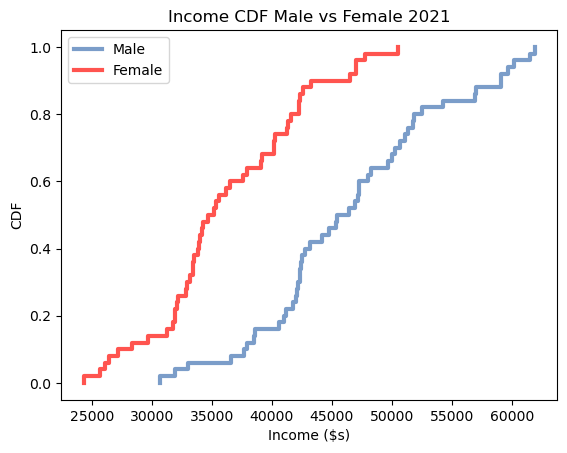

<Figure size 800x600 with 0 Axes>

In [23]:
# Compare the actual cdf Income for Male vs Female
male_cdf = thinkstats2.Cdf(male_df.Income, label="Male")
female_cdf = thinkstats2.Cdf(female_df.Income, label="Female")

thinkplot.PrePlot(2)
thinkplot.Cdf(male_cdf, color=male_blue)
thinkplot.Cdf(female_cdf, color=female_red)
thinkplot.Show(xlabel="Income ($s)", ylabel="CDF", 
               title="Income CDF Male vs Female 2021", 
               loc='upper left')

## Labor Participation and Employment - Correlation and Causation

In [24]:
# Difference between 2 means using Covariance
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [25]:
# Compute the Pearson Correlation of Labor Participation vs Employment
def Pearson_Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    covariance = Cov(xs, ys, meanx, meany)
    pearson_corr = covariance / np.sqrt(varx * vary)
    return pearson_corr, covariance

In [26]:
# Compute the Spearman Correlation of Labor Participation vs Employment
def SpearmanCorr(xs, ys):
    cxs = pd.Series(xs).rank() 
    cys = pd.Series(ys).rank()
    spearman_corr = Corr(cxs,cys)
    return spearman_corr

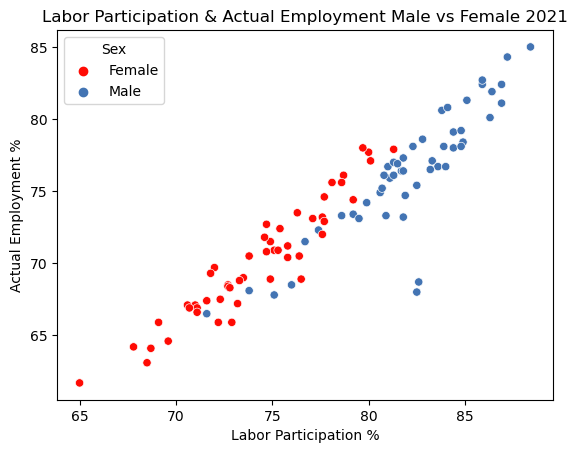

In [27]:
# Labor Participation and Employment for both Males and Females
employ_scatter = sns.scatterplot(data=MVF_df, x='Labor_Participation_PCT', 
                                 y='Employment_PCT', hue='Sex')
employ_scatter.set_title(
    "Labor Participation & Actual Employment Male vs Female 2021")
employ_scatter.set(ylabel="Actual Employment %", xlabel="Labor Participation %")

plt.show()

In [28]:
# Compute the Pearson, Spearman Correlation and 
# Covariance of Labor Participation % to Employment %
labor_pct = MVF_df.Labor_Participation_PCT
employ_pct = MVF_df.Employment_PCT

pearson_correlation, covariance = Pearson_Corr(labor_pct, employ_pct)
spearman_correlation = SpearmanCorr(labor_pct, employ_pct)

print('Correlation and Covariance for Males & Females')
print('Covariance - ', covariance)
print('Pearson Correlation -', pearson_correlation)
print('Spearman Correlation -', spearman_correlation)

Correlation and Covariance for Males & Females
Covariance -  25.580689000000003
Pearson Correlation - 0.9303953928574752
Spearman Correlation - 0.9201966128413533


### Commentary

At above 90%, there is a direct correlation between Labor Participation and Employment. This also explains the causation; you have to be available to work and looking for work to ultimately be employed.  

With a covariance greater than 1, it reinforces the correlation information.

Two outliers also appear for Hawaii and Alaska.  These states have more significant seasonal employment:  Hawaii due to tourism and Alaska because of weather and the remote population location.

The graph (above) depicts a positive correlation; as the percentage of labor participation increases, so does the employment percentage for each state.   

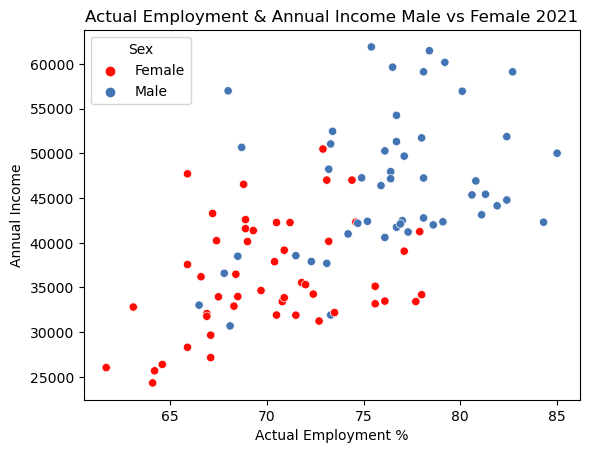

In [29]:
# Employment and Income for both Males and Females
employ_scatter = sns.scatterplot(data=MVF_df, x='Employment_PCT', 
                                 y='Income', hue='Sex')
employ_scatter.set_title(
    "Actual Employment & Annual Income Male vs Female 2021")
employ_scatter.set(ylabel="Annual Income", xlabel="Actual Employment %")

plt.show()

In [30]:
# Compute the Pearson, Spearman Correlation and 
# Covariance of Employment % to Income
employ_pct = MVF_df.Employment_PCT
ann_income = MVF_df.Income

pearson_correlation, covariance = Pearson_Corr(employ_pct, ann_income)
spearman_correlation = SpearmanCorr(employ_pct, ann_income)

print('Correlation and Covariance for Males & Females')
print('Covariance - ', covariance)
print('Pearson Correlation -', pearson_correlation)
print('Spearman Correlation -', spearman_correlation)

Correlation and Covariance for Males & Females
Covariance -  26023.449900000003
Pearson Correlation - 0.5786722730090138
Spearman Correlation - 0.5956455357162768


### Commentary

At approx. 55%, there is a weaker correlation between Employment and Income. A larger state employment rate leads to a greater annual income per state.  A covariance greater than 1 reinforces the correlation information even when a percentage and a large number are compared.

The graph (above) depicts a positive correlation since it is trending upward; as the percentage of employment increases, the annual income may increase for each state.


## Women make 83% of Men's Income - Hypothesis Testing

In [31]:
# Permutation tests
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [32]:
# Means tests
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        
        return test_stat

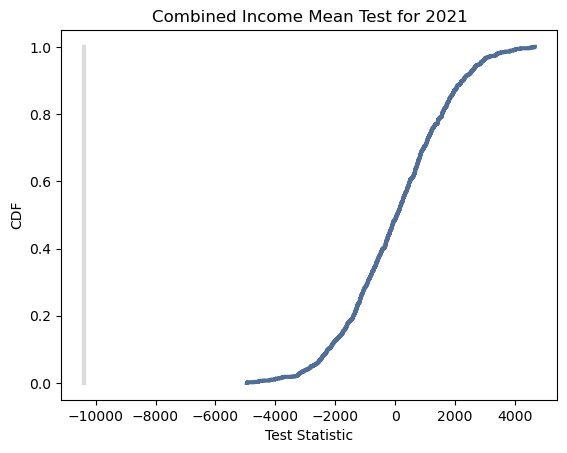

In [33]:
# Compare the means of the Income

male_income = male_df.Income.dropna().values
female_income = female_df.Income.dropna().values

data = (female_income, male_income)
imean = DiffMeansOneSided(data)
pv = imean.PValue()

imean.PlotCdf()
thinkplot.Config(xlabel='Test Statistic', ylabel='CDF', 
               title='Combined Income Mean Test for 2021')
plt.show()


In [34]:
# Get the % of women to men income.
female_mean = female_income.mean()
male_mean = male_income.mean()
income_percentage = round((female_mean / male_mean) * 100, 2)
string_percentage = str(income_percentage) + "% of Men"

print("The P-Value =", pv)
print("The Mean of Womens Income =", female_mean)
print("The Mean of Mens Income =", male_mean)
print("The Income of Women is", string_percentage)

The P-Value = 1.0
The Mean of Womens Income = 36229.78
The Mean of Mens Income = 46619.62
The Income of Women is 77.71% of Men


### Commentary

It is commonly thought that the average woman's income is 83% of what men make.  
The Status of Women in the United States website says it's 79.2%.  After creating
the means of all the state's incomes by gender and comparing the mean incomes of 
men to women, women make 77.7% of mean of men's incomes.

## Labor Participation and Employment - Least Squares Regression

In [35]:
# Testing for Both Male and Female

formula = "Labor_Participation_PCT ~ Employment_PCT + Sex_ID<=1"
model = smf.ols(formula, data=MVF_df)
results = model.fit()
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     Labor_Participation_PCT   R-squared:                       0.866
Model:                                 OLS   Adj. R-squared:                  0.864
Method:                      Least Squares   F-statistic:                     631.4
Date:                     Sat, 04 Mar 2023   Prob (F-statistic):           1.67e-44
Time:                             21:36:41   Log-Likelihood:                -208.06
No. Observations:                      100   AIC:                             420.1
Df Residuals:                           98   BIC:                             425.3
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

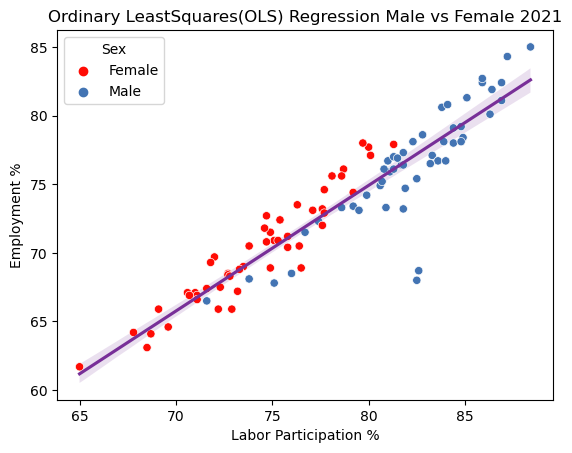

In [36]:
# Plot LeastSquares Regression
employ_scatter = sns.regplot(data=MVF_df, x='Labor_Participation_PCT', 
                             y='Employment_PCT', color=combined, scatter=False)
employ_scatter = sns.scatterplot(data=MVF_df, x='Labor_Participation_PCT', 
                                 y='Employment_PCT', hue='Sex')
employ_scatter.set_title(
    "Ordinary LeastSquares(OLS) Regression Male vs Female 2021")
employ_scatter.set(ylabel="Employment %", xlabel="Labor Participation %")

plt.show()

The graph (above) represents a positive correlation, and the clustering around the 
regression line depicts the closeness of the relationship between Labor 
Participation, and Employment, the R-squared of 0.866 reinforces that this is a 
positive linear relationship.